## 막대그래프(bar chart)

### 1. 기본막대그래프

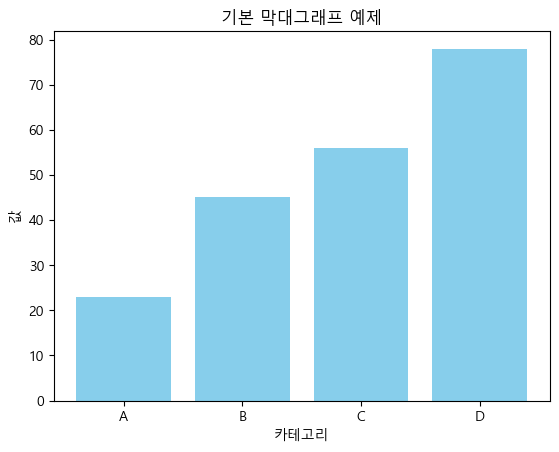

In [2]:
import matplotlib.pyplot as plt

# Windows에서 한글이 잘 보이는 기본 폰트 설정 (예: 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 깨짐 방지

# 데이터 정의
labels = ['A', 'B', 'C', 'D']
values = [23, 45, 56, 78]

# 막대그래프 그리기
plt.bar(labels, values, color='skyblue')

# 제목과 축 레이블 설정
plt.title('기본 막대그래프 예제')
plt.xlabel('카테고리')
plt.ylabel('값')

# 그래프 보여주기
plt.show()


### 2. Pandas 데이터프레임 기반 막대그래프

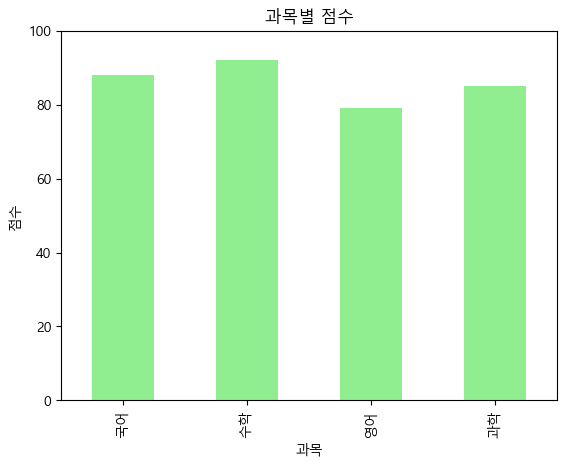

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 생성
data = {
    '과목': ['국어', '수학', '영어', '과학'],
    '점수': [88, 92, 79, 85]
}
df = pd.DataFrame(data)

# 막대그래프 시각화
df.plot(kind='bar', x='과목', y='점수', color='lightgreen', legend=False)

# 제목과 축 레이블
plt.title('과목별 점수')
plt.xlabel('과목')
plt.ylabel('점수')
plt.ylim(0, 100)

# 그래프 출력
plt.show()


In [ ]:
# 수평 막대그래프 (horizontal bar chart)

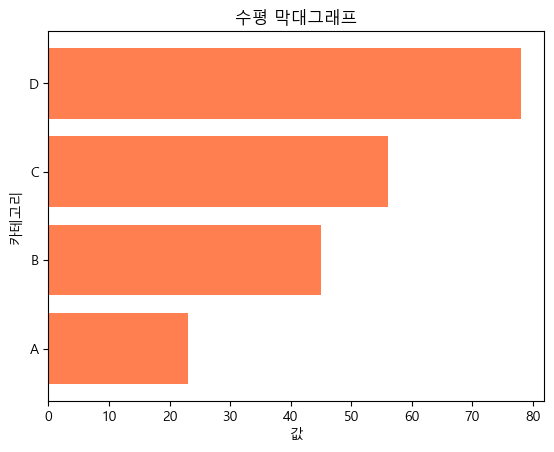

In [5]:
plt.barh(labels, values, color='coral')
plt.title('수평 막대그래프')
plt.xlabel('값')
plt.ylabel('카테고리')
plt.show()


## 3. 월별 주가 변화 (예: 삼성전자 가상 데이터)

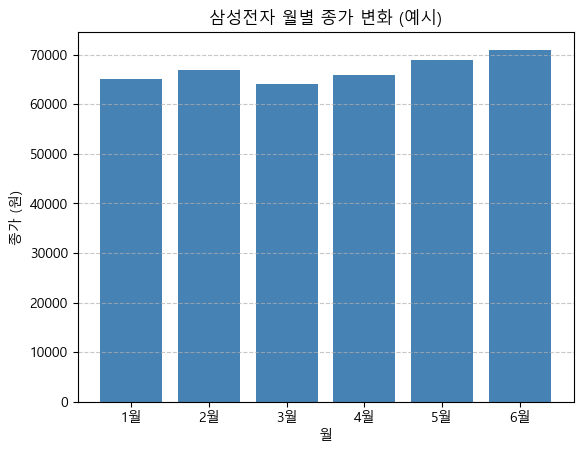

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# 월별 주가 예시 데이터
data = {
    '월': ['1월', '2월', '3월', '4월', '5월', '6월'],
    '종가': [65000, 67000, 64000, 66000, 69000, 71000]
}
df = pd.DataFrame(data)

# 막대그래프 그리기
plt.bar(df['월'], df['종가'], color='steelblue')

# 제목 및 라벨
plt.title('삼성전자 월별 종가 변화 (예시)')
plt.xlabel('월')
plt.ylabel('종가 (원)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


## 4. 2. 섹터별 수익률 비교

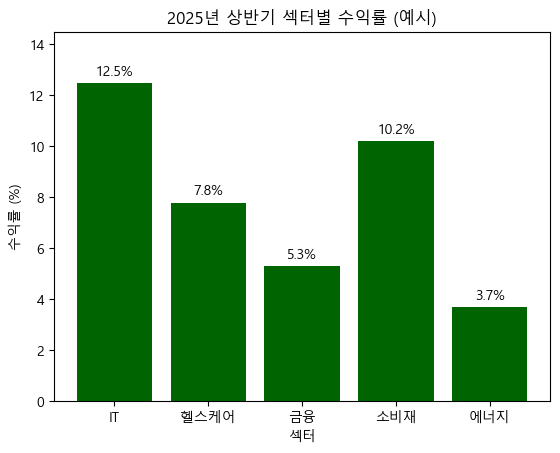

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# 섹터별 수익률 예시 데이터 (%)
data = {
    '섹터': ['IT', '헬스케어', '금융', '소비재', '에너지'],
    '수익률': [12.5, 7.8, 5.3, 10.2, 3.7]
}
df = pd.DataFrame(data)

# 막대그래프
plt.bar(df['섹터'], df['수익률'], color='darkgreen')

# 라벨 및 제목
plt.title('2025년 상반기 섹터별 수익률 (예시)')
plt.xlabel('섹터')
plt.ylabel('수익률 (%)')
plt.ylim(0, max(df['수익률']) + 2)

# 수익률 숫자 표시
for i, v in enumerate(df['수익률']):
    plt.text(i, v + 0.3, f'{v}%', ha='center')

plt.show()


## 5. 삼성전자 월별 거래량 시각화 

C:\Users\JYB\AppData\Local\Temp\ipykernel_31504\3967280341.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volume = df['거래량'].resample('M').sum()


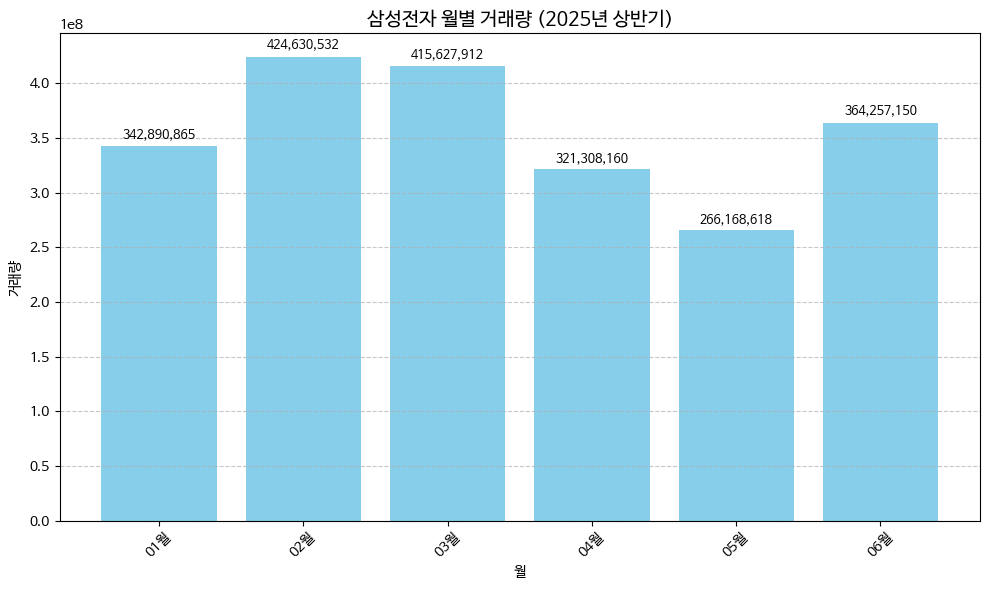

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock
from datetime import datetime

# 날짜 범위 설정
start_date = "2025-01-01"
end_date = "2025-06-30"

# 일별 거래 정보 조회
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")  # 삼성전자
df.index = pd.to_datetime(df.index)

# 월별로 그룹화하여 거래량 합계 계산
monthly_volume = df['거래량'].resample('M').sum()

# 날짜 포맷 정리 (예: 2024-01 → 1월)
monthly_volume.index = monthly_volume.index.strftime('%m월')

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(monthly_volume.index, monthly_volume.values, color='skyblue')

# 그래프 제목 및 라벨
plt.title('삼성전자 월별 거래량 (2025년 상반기)', fontsize=14)
plt.xlabel('월')
plt.ylabel('거래량')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 거래량 숫자 라벨 추가
for i, v in enumerate(monthly_volume.values):
    plt.text(i, v + v*0.01, f'{v:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## 6. 거래량 + 시가/고가/저가/종가

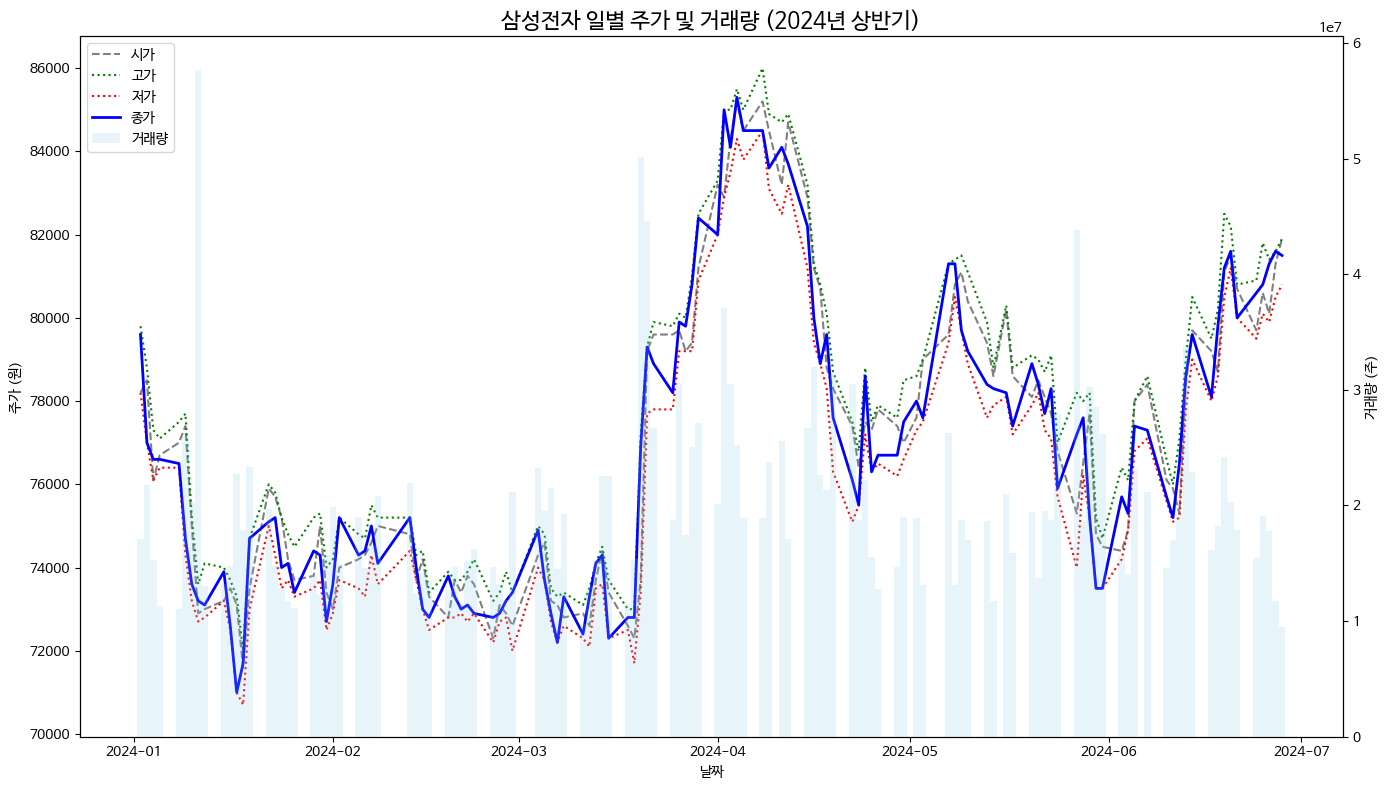

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock

# 조회 기간
start_date = "2024-01-01"
end_date = "2024-06-30"

# 삼성전자 데이터 가져오기
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")
df.index = pd.to_datetime(df.index)

# 그래프 사이즈
plt.figure(figsize=(14, 8))

# ── 1. 시가, 고가, 저가, 종가 선그래프
plt.plot(df.index, df['시가'], label='시가', linestyle='--', color='gray')
plt.plot(df.index, df['고가'], label='고가', linestyle=':', color='green')
plt.plot(df.index, df['저가'], label='저가', linestyle=':', color='red')
plt.plot(df.index, df['종가'], label='종가', linewidth=2, color='blue')

# ── 2. 거래량을 막대그래프로 별도 축에 표시
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.bar(df.index, df['거래량'], width=1.0, alpha=0.2, label='거래량', color='skyblue')

# 제목 및 레이블
plt.title("삼성전자 일별 주가 및 거래량 (2024년 상반기)", fontsize=16)
ax1.set_xlabel("날짜")
ax1.set_ylabel("주가 (원)")
ax2.set_ylabel("거래량 (주)")

# 범례
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# X축 날짜 간격 축소
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()


## 7. 월별 변동성 비교 (막대그래프)

In [ ]:
# 목적
# 변동성 지표: 일일 수익률의 표준편차 (Standard Deviation)

# 기간: 2023년 1월 ~ 2024년 6월

# 방식: 월별 또는 분기별로 수익률 표준편차를 계산하여 비교

# 시각화: 막대그래프 또는 선 그래프

### 7-1  월별 변동성 비교 (막대그래프)

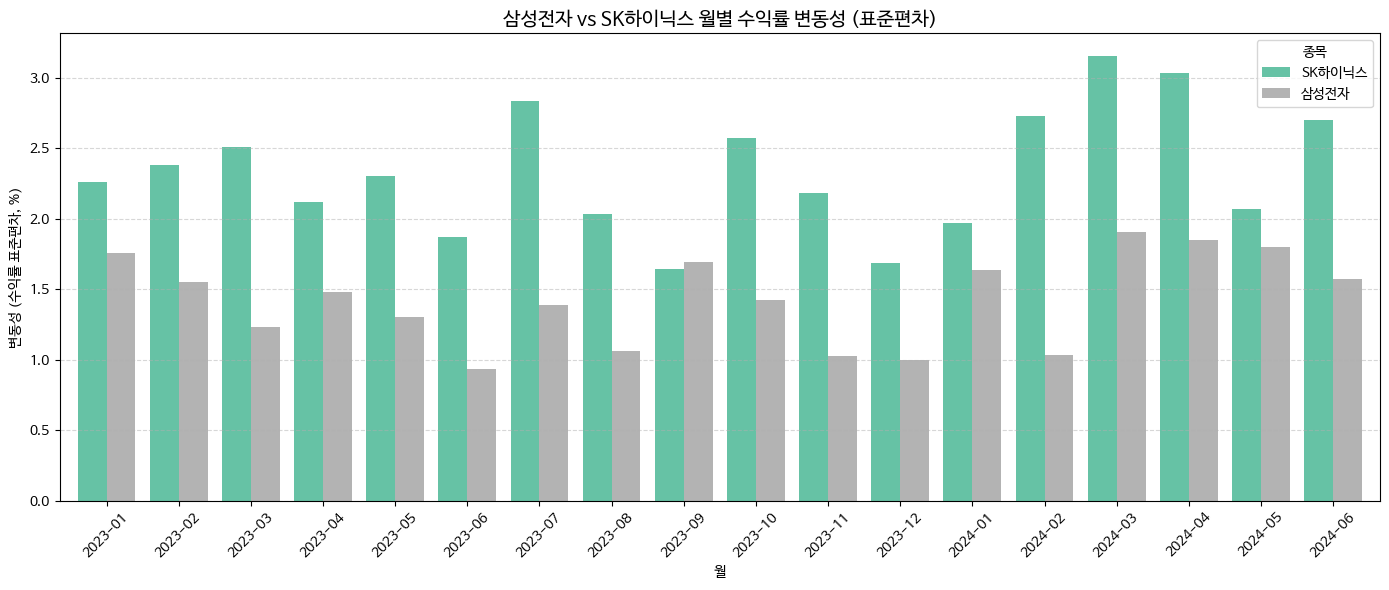

In [11]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# ▶️ 1. 데이터 수집 함수
def get_daily_return(code, name):
    df = stock.get_market_ohlcv_by_date("2023-01-01", "2024-06-30", code)
    df.index = pd.to_datetime(df.index)
    df['수익률'] = df['종가'].pct_change() * 100
    df['월'] = df.index.to_period("M").astype(str)
    df['종목'] = name
    return df[['월', '수익률', '종목']].dropna()

# ▶️ 2. 두 종목 데이터 가져오기
samsung_df = get_daily_return("005930", "삼성전자")
skhynix_df = get_daily_return("000660", "SK하이닉스")

# ▶️ 3. 결합 및 그룹화 후 표준편차 계산
df = pd.concat([samsung_df, skhynix_df])
volatility = df.groupby(['월', '종목'])['수익률'].std().reset_index()
pivot = volatility.pivot(index='월', columns='종목', values='수익률')

# ▶️ 4. 시각화
pivot.plot(kind='bar', figsize=(14, 6), colormap='Set2', width=0.8)
plt.title("삼성전자 vs SK하이닉스 월별 수익률 변동성 (표준편차)", fontsize=14)
plt.ylabel("변동성 (수익률 표준편차, %)")
plt.xlabel("월")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 7-2  종목별 분기별 변동성 시각화 (막대그래프)

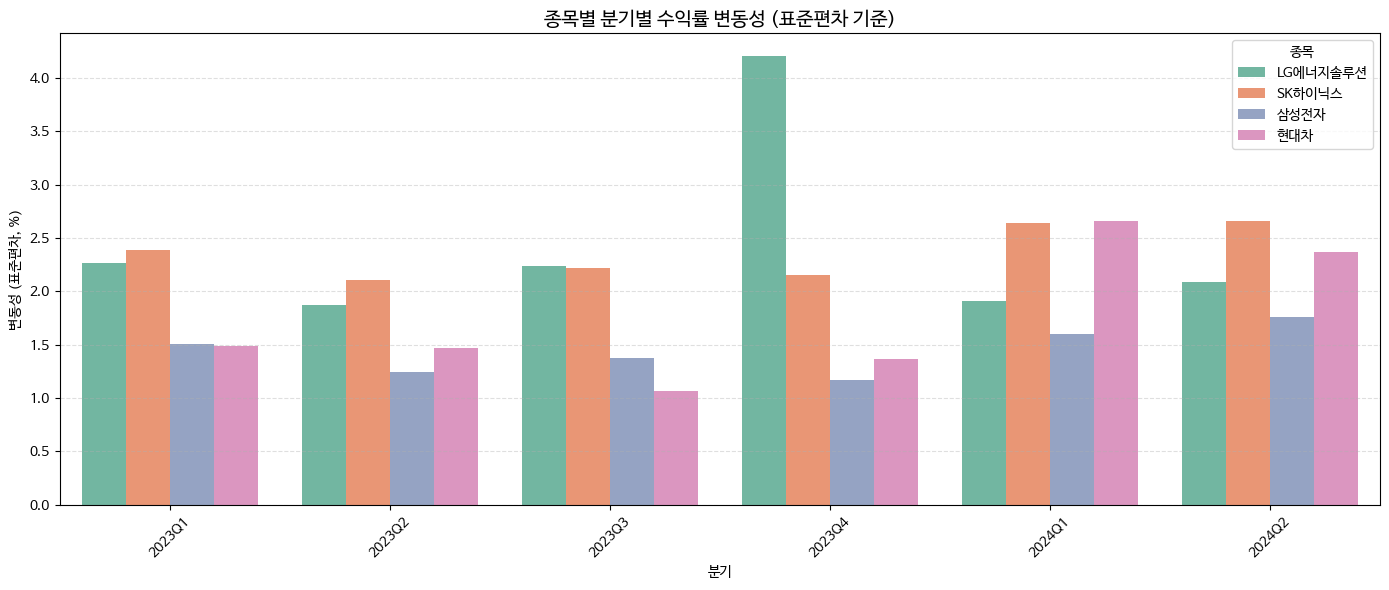

In [13]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ▶️ 1. 수익률 + 분기 계산 함수
def get_quarterly_volatility(code, name):
    df = stock.get_market_ohlcv_by_date("2023-01-01", "2024-06-30", code)
    df.index = pd.to_datetime(df.index)
    df['수익률'] = df['종가'].pct_change() * 100
    df['분기'] = df.index.to_period("Q").astype(str)
    df['종목'] = name
    return df[['분기', '수익률', '종목']].dropna()

# ▶️ 2. 종목별 수익률 데이터
samsung = get_quarterly_volatility("005930", "삼성전자")
skhynix = get_quarterly_volatility("000660", "SK하이닉스")
hyundai = get_quarterly_volatility("005380", "현대차")
lgenergy = get_quarterly_volatility("373220", "LG에너지솔루션")

# ▶️ 3. 통합
merged_df = pd.concat([samsung, skhynix, hyundai, lgenergy])

# ▶️ 4. 분기별 표준편차(변동성) 계산
volatility = merged_df.groupby(['분기', '종목'])['수익률'].std().reset_index()
volatility.rename(columns={'수익률': '변동성'}, inplace=True)

# ▶️ 5. 시각화 (Seaborn barplot)
plt.figure(figsize=(14, 6))
sns.barplot(data=volatility, x='분기', y='변동성', hue='종목', palette='Set2')

plt.title("종목별 분기별 수익률 변동성 (표준편차 기준)", fontsize=14)
plt.xlabel("분기")
plt.ylabel("변동성 (표준편차, %)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title="종목")
plt.tight_layout()
plt.show()


In [ ]:
# 요소	의미
# Y축 값	해당 분기 동안의 일일 수익률의 표준편차
# 막대 높이	변동성 크기, 높을수록 가격 변동이 큼
# Hue 색상	종목 구분 (삼성전자, SK하이닉스, 현대차, LG에너지솔루션)

### 7-2: 누적 기간의 변동성 비교 (전체 기간 요약)

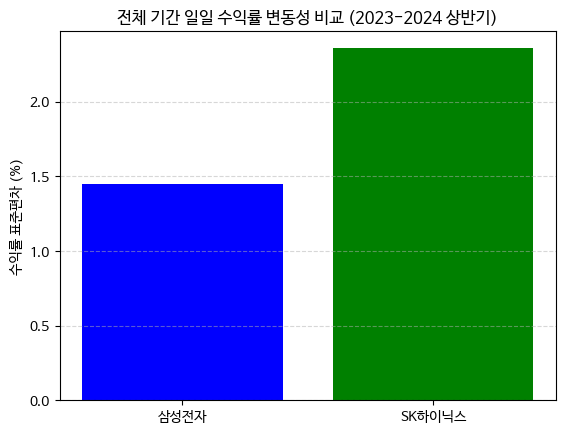

In [12]:
# 전체 기간 동안의 표준편차 요약
samsung_std = samsung_df['수익률'].std()
skhynix_std = skhynix_df['수익률'].std()

# 막대그래프
plt.bar(['삼성전자', 'SK하이닉스'], [samsung_std, skhynix_std], color=['blue', 'green'])
plt.title("전체 기간 일일 수익률 변동성 비교 (2023-2024 상반기)")
plt.ylabel("수익률 표준편차 (%)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
